<a href="https://colab.research.google.com/github/leandro095/Leandro_Repo/blob/main/Plot_dati_storici_ferrovie_secondarie_ita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heatplot coefficienti esercizio 1922-1939

In [ ]:
import pandas as pd
from pathlib import Path

In [ ]:
def carica_file(path):
    df = pd.read_excel(path, header=0)          # 1ª riga = Ferrovie, 1930,1931...
    df = df.rename(columns={df.columns[0]: "ferrovia"})
    df_long = df.melt(id_vars="ferrovia",
                      var_name="anno",
                      value_name="coeff_esercizio")
    df_long["coeff_esercizio"] = (
        df_long["coeff_esercizio"].astype(str)
        .str.replace(",", ".")
        .replace("/", pd.NA)
    )
    df_long["coeff_esercizio"] = pd.to_numeric(df_long["coeff_esercizio"],
                                               errors="coerce")
    df_long["anno"] = pd.to_numeric(df_long["anno"], errors="coerce")
    return df_long.dropna(subset=["ferrovia", "anno", "coeff_esercizio"])

In [ ]:
cartella = Path("/content/drive/MyDrive/Colab Notebooks/HEATMAPS/Coefficienti esercizio/cartella_con_xlsx")
df_unico = pd.concat([carica_file(f) for f in cartella.glob("*.xlsx")],
                     ignore_index=True)

In [ ]:
df_unico.head(20)

,ferrovia,anno,coeff_esercizio
0,Poggibonsi-Colle Val d'Elsa,1930,1.10
1,Arezzo-Pratovecchio Stia,1930,0.85
2,Arezzo-Fossato di Vico,1930,1.07
3,Massa Marittima-Follonica Porto,1930,0.90
4,Orbetello-Porto Santo Stefano,1930,0.91
5,Ferrovia Alto Pistoiese,1930,0.87
6,Siena-Buonconvento-Monte Antico,1930,3.14
7,Poggibonsi-Colle Val d'Elsa,1931,1.27
8,Arezzo-Pratovecchio Stia,1931,1.04
9,Arezzo-Fossato di Vico,1931,1.12


In [ ]:
df_unico.isna().sum()

,0
ferrovia,0
anno,0
coeff_esercizio,0


In [ ]:
df_unico["anno"].unique()
df_unico[df_unico["ferrovia"].str.contains("Poggibonsi", case=False)]


,ferrovia,anno,coeff_esercizio
0,Poggibonsi-Colle Val d'Elsa,1930,1.1000
7,Poggibonsi-Colle Val d'Elsa,1931,1.2700
15,Poggibonsi-Colle Val d'Elsa,1932,1.2500
24,Poggibonsi-Colle Val d'Elsa,1933,1.3000
33,Poggibonsi-Colle Val d'Elsa,1934,1.9200
62,Poggibonsi-Colle Val d'Elsa,1922,0.7718
69,Poggibonsi-Colle Val d'Elsa,1924,0.8922
74,Poggibonsi-Colle Val d'Elsa,1927,0.9365


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tab = df_unico.pivot_table(index="ferrovia", columns="anno", values="coeff_esercizio")

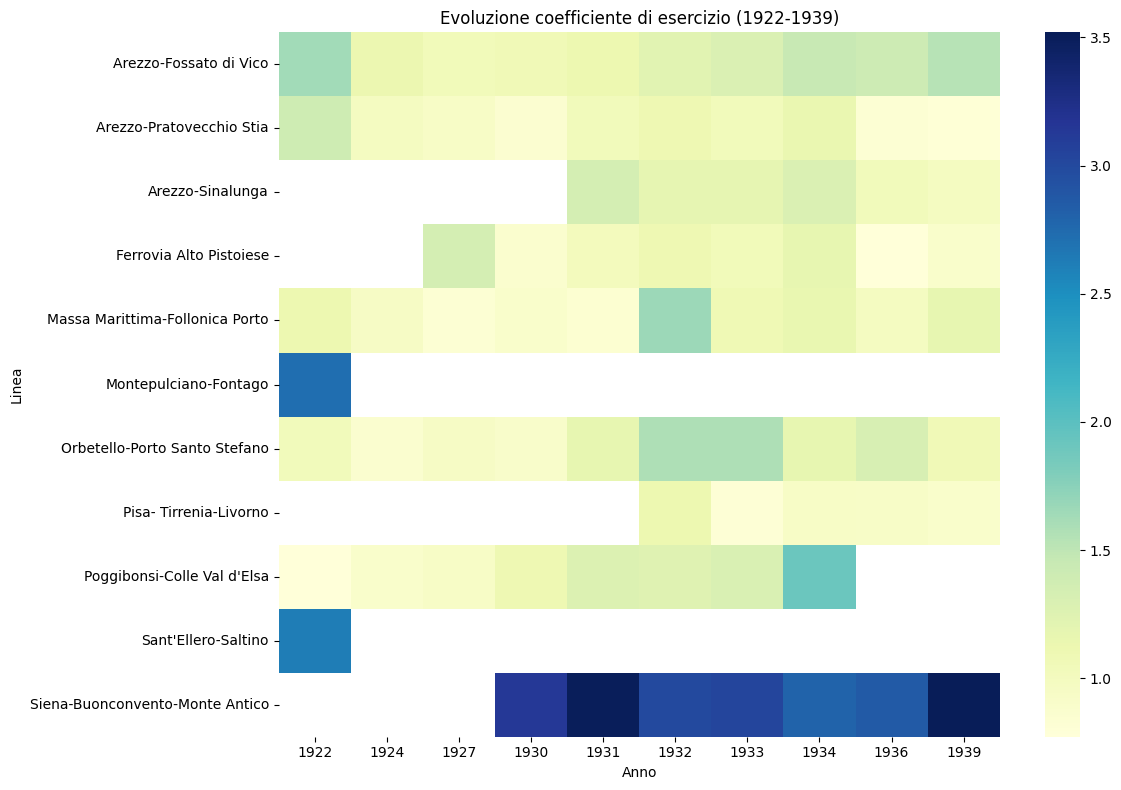

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(tab, cmap="YlGnBu")
plt.title("Evoluzione coefficiente di esercizio (1922-1939)")
plt.xlabel("Anno")
plt.ylabel("Linea")
plt.tight_layout()
plt.show()

# TRAFFICO MERCI TOSCANE 1891-1918

In [ ]:
def carica_file_traffici(path):
    df = pd.read_excel(path, header=0)          # 1ª riga = Ferrovie, 1930,1931...
    df = df.rename(columns={df.columns[0]: "ferrovia"})
    df_long = df.melt(id_vars="ferrovia",
                      var_name="anno",
                      value_name="Traffico_merci")
    df_long["Traffico_merci"] = (
        df_long["Traffico_merci"].astype(str)
        .str.replace(",", ".")
        .replace("/", pd.NA)
    )
    df_long["Traffico_merci"] = pd.to_numeric(df_long["Traffico_merci"],
                                               errors="coerce")
    df_long["anno"] = pd.to_numeric(df_long["anno"], errors="coerce")
    return df_long.dropna(subset=["ferrovia", "anno", "Traffico_merci"])

In [ ]:
cartella_traffici = Path("/content/drive/MyDrive/Colab Notebooks/HEATMAPS/Coefficienti esercizio/cartella_con_merci")
df_trafficimerci = pd.concat([carica_file_traffici(f) for f in cartella_traffici.glob("*.xlsx")],
                     ignore_index=True)

In [ ]:
df_trafficimerci.head(5)

,ferrovia,anno,Traffico_merci
0,Arezzo-Pratovecchio Stia,1901,20271.0
1,Arezzo-Fossato di Vico,1901,39620.0
2,Poggibonsi-Colle Val d'Elsa,1901,36324.0
3,Ribolla-Giuncarico,1901,36099.0
4,Sant'Ellero-Saltino,1901,2437.0


In [ ]:
df_trafficimerci.isna().sum()

,0
ferrovia,0
anno,0
Traffico_merci,0


In [ ]:
tab_merci = df_trafficimerci.pivot_table(index="ferrovia", columns="anno", values="Traffico_merci")

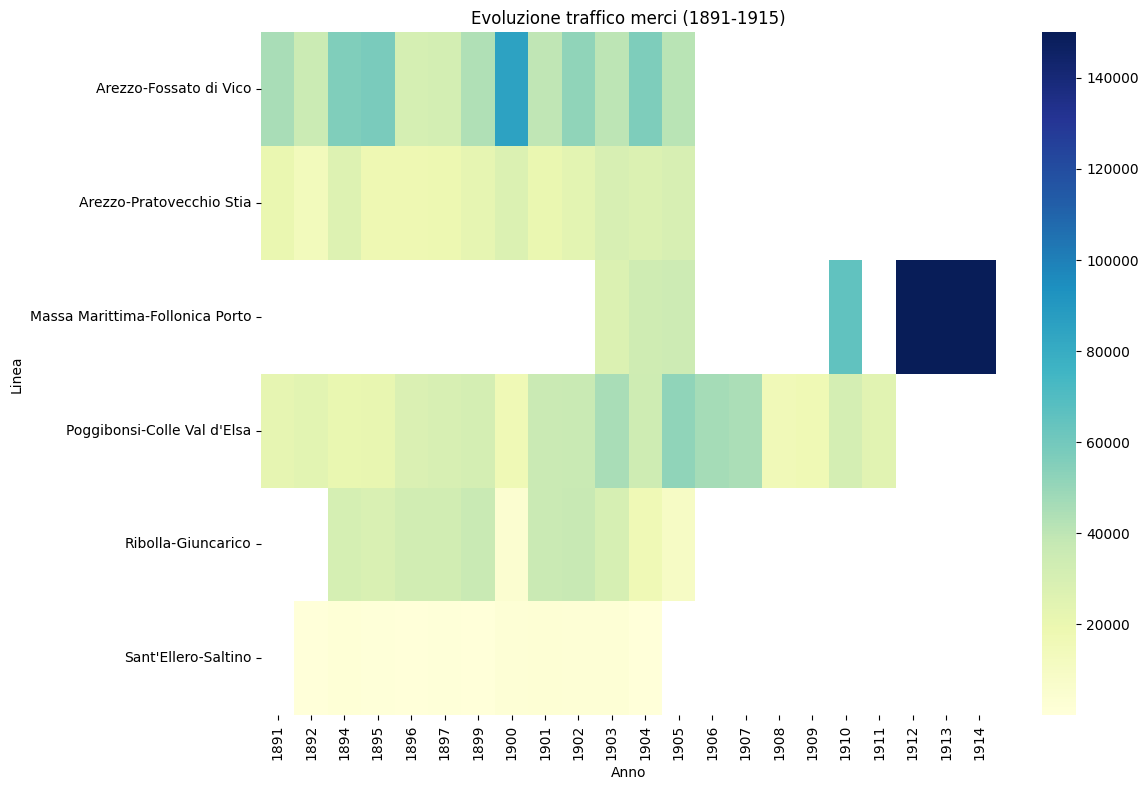

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(tab_merci, cmap="YlGnBu")
plt.title("Evoluzione traffico merci (1891-1915)")
plt.xlabel("Anno")
plt.ylabel("Linea")
plt.tight_layout()
plt.show()

In [ ]:
df_filtro = df_trafficimerci[df_trafficimerci["anno"] <= 1905].copy()

In [ ]:
tab_merci_1861_1905 = df_filtro.pivot_table(
    index="ferrovia",
    columns="anno",
    values="Traffico_merci"
)

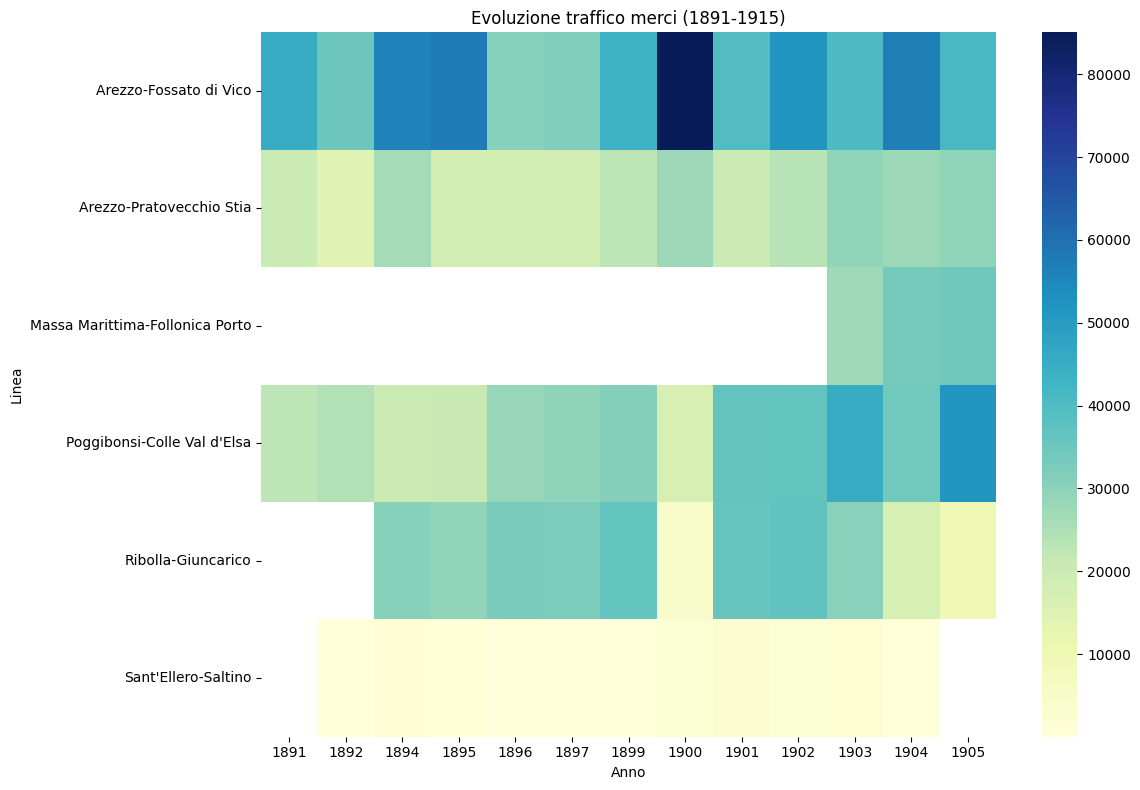

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(tab_merci_1861_1905, cmap="YlGnBu")
plt.title("Evoluzione traffico merci (1891-1915)")
plt.xlabel("Anno")
plt.ylabel("Linea")
plt.tight_layout()
plt.show()